<a href="https://colab.research.google.com/github/mingusmingus/MONET/blob/main/Proyecto/MONET_v1_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

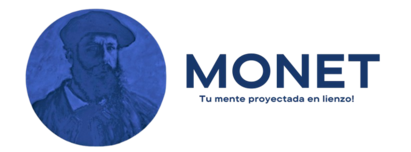

In [ ]:

#--------------------------------------------------------------------------------------#
# GUI AJUSTES MENORES: IMPLEMENTACIÓN DE DESCARGAS Y CAMBIO DE FORMATO .webp a .jpg    #
#--------------------------------------------------------------------------------------#


# Instalación de bibliotecas para generación de texto e imágenes

Este conjunto de comandos permite instalar las bibliotecas necesarias para trabajar con modelos de inteligencia artificial, específicamente para la generación de texto e imágenes.

In [ ]:
# Instalar Hugging Face Transformers y Diffusers para generación de texto e imágenes
!pip install transformers diffusers accelerate torch torchvision

# Instalar TextBlob para detección de emociones
!pip install textblob

# Descargar datos de entrenamiento para TextBlob (necesario para análisis de texto)
!python -m textblob.download_corpora

# Instalar deep-translator y Gradio
!pip install deep-translator gradio

# Carga de modelos para clasificación de emociones y generación de imágenes

Este conjunto de comandos permite cargar dos modelos clave para el procesamiento de texto y la generación de imágenes:

## Modelos Cargados

1. **Clasificador de Emociones**:
   - Se carga un modelo de clasificación de texto de Hugging Face, específicamente el modelo **"j-hartmann/emotion-english-distilroberta-base"**.
   - Este modelo se utiliza para detectar emociones en textos.

2. **Stable Diffusion**:
   - Se carga el modelo **Stable Diffusion** de la versión **"runwayml/stable-diffusion-v1-5"**.
   - Este modelo se utiliza para generar imágenes basadas en descripciones de texto.
   - El modelo se ejecuta en una GPU **CUDA** para mejorar el rendimiento.


In [ ]:
from transformers import pipeline
from deep_translator import GoogleTranslator
from diffusers import StableDiffusionPipeline
from PIL import Image  # Importar PIL para manipulación de imágenes
import time

# Cargar el modelo de clasificación de emociones
clasificador_emociones = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Cargar el modelo Stable Diffusion
modelo_sd = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")

# Funciones para detección de emociones y generación de imágenes
Este conjunto de funciones destaca por su capacidad para analizar texto y generar imágenes de manera creativa. A continuación, los puntos clave:

## Detección de Emociones

- Traduce automáticamente el texto al inglés con `deep-translator` para aprovechar modelos avanzados.
- Identifica la emoción dominante utilizando un modelo especializado de clasificación.
- Traduce las emociones detectadas al español para una mejor comprensión del usuario.

## Generación de Imágenes

- Asocia cada emoción con descripciones visuales detalladas, como paisajes o escenas abstractas.
- Genera imágenes de alta calidad mediante el modelo Stable Diffusion, reflejando fielmente la emoción detectada.



In [ ]:
def detectar_emocion(texto):
    # Traducir el texto al inglés usando deep-translator
    texto_traducido = GoogleTranslator(source='auto', target='en').translate(texto)

    # Detectar emoción en inglés
    resultados = clasificador_emociones(texto_traducido)
    emocion_dominante = max(resultados[0], key=lambda x: x['score'])

    # Diccionario de traducción de emociones
    emociones_traducidas = {
        "joy": "alegría",
        "sadness": "tristeza",
        "anger": "enojo",
        "fear": "miedo",
        "love": "amor",
        "surprise": "sorpresa"
    }
    return emociones_traducidas.get(emocion_dominante['label'], "desconocida")

def generar_imagen(emocion):
    descripciones = {
        "alegría": "a bright and colorful painting of a sunny meadow with flowers",
        "tristeza": "a dark and moody oil painting of a rainy cityscape",
        "enojo": "an abstract painting with bold red and black strokes",
        "miedo": "a surreal painting of a shadowy forest with eerie lighting",
        "amor": "a romantic scene of a couple under a glowing sunset",
        "sorpresa": "a vibrant and dynamic painting with explosive colors and shapes"
    }

    descripcion = descripciones.get(emocion, "a beautiful abstract art piece")
    imagen = modelo_sd(descripcion).images[0]

    # Convertir la imagen a RGB para guardarla como JPG
    imagen = imagen.convert("RGB")

    return imagen

# Funciones para Guardar Imágenes y Procesar Texto en Gradio

Este conjunto de funciones permite guardar imágenes generadas y procesar el texto ingresado por el usuario, todo dentro de una interfaz creada con **Gradio**. A continuación, se destacan los puntos clave:

## 1. Guardar Imágenes

La función `guardar_imagen` se encarga de:

- **Generación de Nombre de Archivo**: Crea un nombre único para la imagen utilizando un timestamp y la emoción detectada.
- **Formato JPG**: Guarda la imagen en formato JPG en el entorno de Colab, lo que facilita su uso y almacenamiento.
- **Enlace de Descarga**: Proporciona la ruta donde se guarda la imagen, permitiendo su posterior descarga.

## 2. Procesar Texto

La función `procesar_texto` realiza las siguientes tareas:

- **Detección de Emoción**: Llama a la función `detectar_emocion` para identificar la emoción del texto ingresado.
- **Generación de Imagen**: Utiliza `generar_imagen` para crear una imagen basada en la emoción detectada.
- **Guardar Imagen**: Llama a `guardar_imagen` para almacenar la imagen generada y obtener su ruta.

## 3. Interfaz Gradio

Se crea una interfaz Gradio que incluye:

- **Entrada**: Un cuadro de texto donde el usuario puede escribir cómo se siente.
- **Salida**: Muestra la imagen generada y la emoción detectada.
- **Compartibilidad**: Gradio genera un enlace que permite compartir fácilmente la aplicación con otros usuarios.

## Lanzamiento

Finalmente, se inicia la interfaz con `iface.launch()`, permitiendo a los usuarios interactuar con el sistema de manera sencilla y efectiva.


In [ ]:
import gradio as gr

def guardar_imagen(imagen, emocion_detectada):
    """
    Guarda la imagen generada en el entorno de Colab y crea un enlace de descarga.
    """
    # Crear un nombre de archivo basado en el timestamp
    timestamp = time.strftime("%Y%m%d-%H%M%S")  # Genera la fecha y hora actual en formato único
    nombre_imagen = f"{emocion_detectada}_{timestamp}.jpg"  # Cambiar a .jpg
    ruta_guardado_colab = f"/content/{nombre_imagen}"

    # Guardar la imagen en formato JPG
    imagen.save(ruta_guardado_colab, format="JPEG")  # Guardar como JPG
    print(f"Imagen guardada en: {ruta_guardado_colab}")

    return ruta_guardado_colab, nombre_imagen

def procesar_texto(sentimiento_usuario):
    emocion_detectada = detectar_emocion(sentimiento_usuario)
    imagen_generada = generar_imagen(emocion_detectada)

    # Guardar imagen y obtener la ruta
    ruta_imagen, nombre_imagen = guardar_imagen(imagen_generada, emocion_detectada)

    return ruta_imagen, emocion_detectada

# Crear la interfaz Gradio con la nueva sintaxis
iface = gr.Interface(
    fn=procesar_texto,
    inputs=gr.Textbox(label="¿Cómo te sientes hoy?"),
    outputs=[gr.Image(label="Imagen Generada"), gr.Textbox(label="Emoción Detectada")],
    title="Detección de Emociones y Generación de Imágenes",
    description="Introduce tu sentimiento y genera una imagen basada en la emoción detectada."
)

# Ejecutar la interfaz :)
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2da01cfc81bb5440d1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


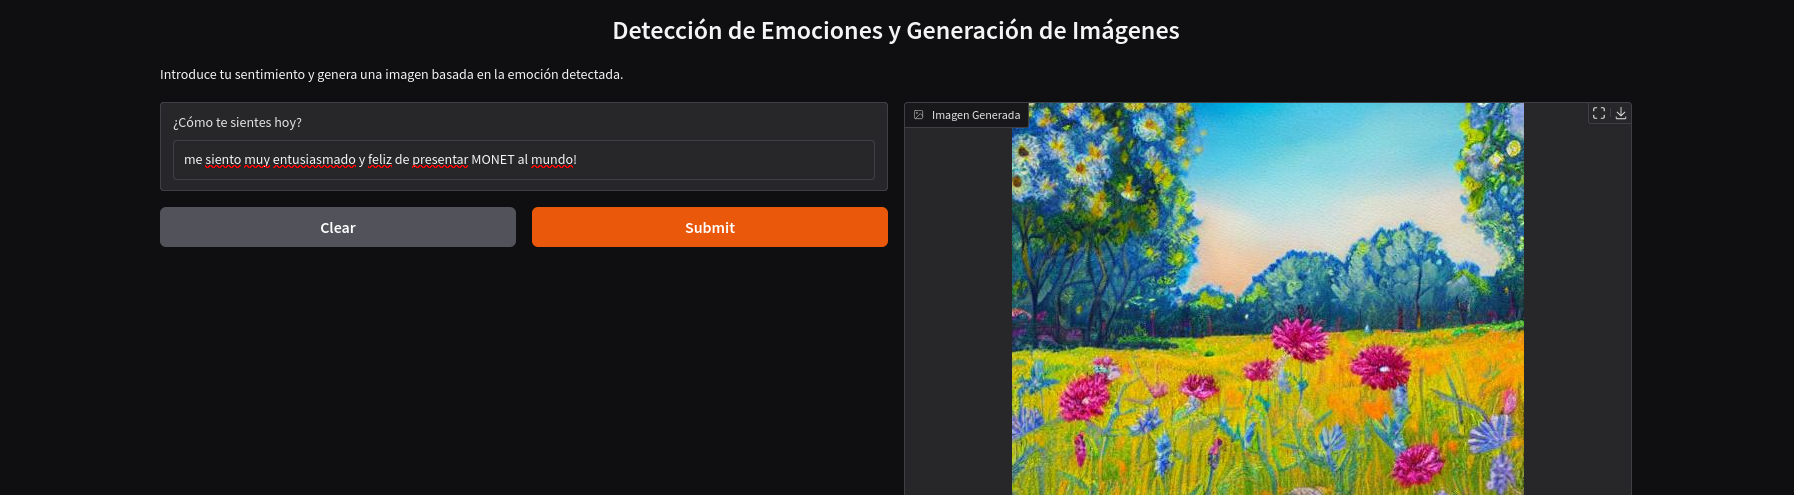